<a href="https://colab.research.google.com/github/Lohith625/Diamond-/blob/main/heart_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.getcwd()



'/content'

In [2]:
import pandas as pd
df=pd.read_csv("/content/cleaned_merged_heart_dataset.csv")
print(df.head())
print(df.info())
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0   63    1   3       145   233    1        0       150      0      2.3   
1   37    1   2       130   250    0        1       187      0      3.5   
2   41    0   1       130   204    0        0       172      0      1.4   
3   56    1   1       120   236    0        1       178      0      0.8   
4   57    0   0       120   354    0        1       163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int

In [4]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


/tmp/ipython-input-3339720054.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [6]:
df['chol'].fillna(df['chol'].median(),inplace=True)

/tmp/ipython-input-3164889517.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['chol'].fillna(df['chol'].median(),inplace=True)


In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("cleaned_merged_heart_dataset.csv")

# Fill missing values
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column] = df[column].fillna(df[column].median())  # numeric -> fill with median
    else:
        df[column] = df[column].fillna(df[column].mode()[0])  # categorical -> fill with mode

print("✅ Missing values filled successfully!")


✅ Missing values filled successfully!


In [9]:
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 1286
Duplicates after: 0


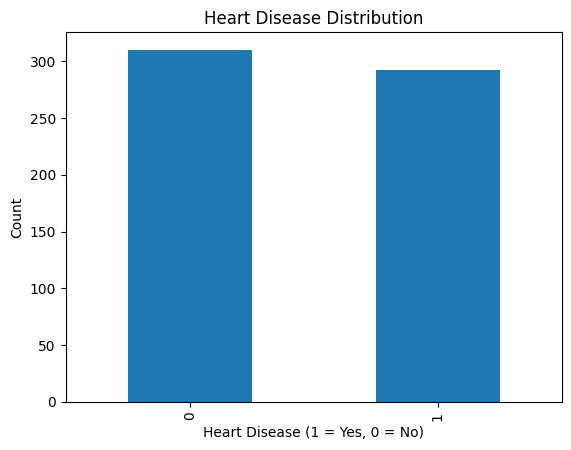

In [10]:
import matplotlib.pyplot as plt

# Example: visualize target variable (who had heart disease vs not)
df['target'].value_counts().plot(kind='bar')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.title('Heart Disease Distribution')
plt.show()

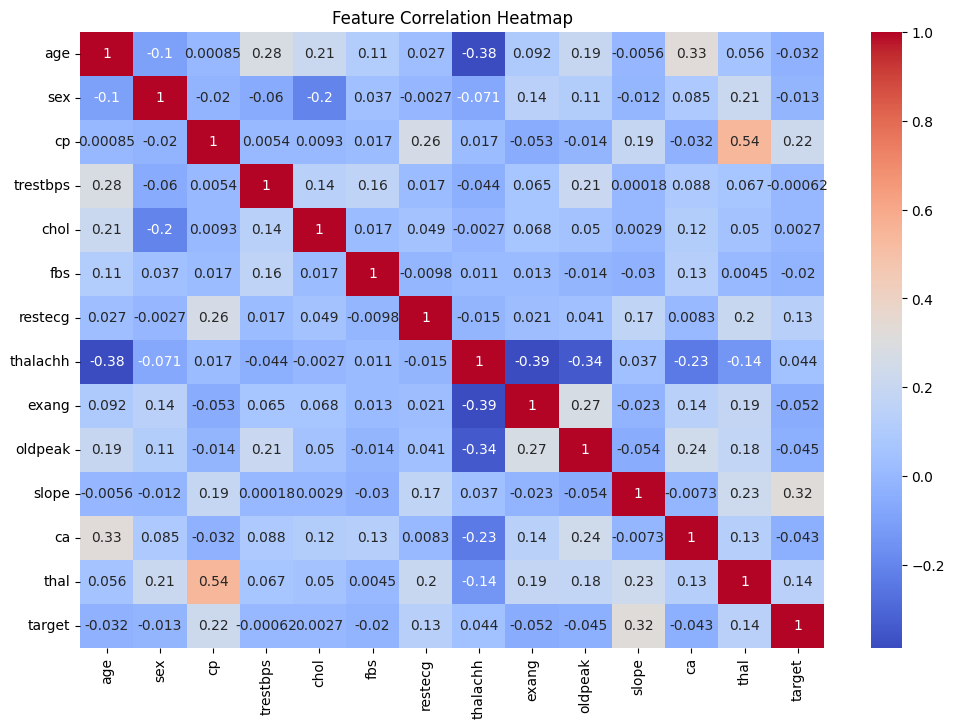

In [11]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
X = df.drop(columns=['target'])  # features
y = df['target']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6859504132231405
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        62
           1       0.68      0.68      0.68        59

    accuracy                           0.69       121
   macro avg       0.69      0.69      0.69       121
weighted avg       0.69      0.69      0.69       121



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Logistic Regression Accuracy: 0.6860
Random Forest Accuracy: 0.8099
SVM Accuracy: 0.8099
KNN Accuracy: 0.7355


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8150987972508592


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Use your final chosen model (replace with grid.best_estimator_ if you used GridSearchCV)
final_model = grid.best_estimator_   # Or your chosen model

# Predictions
y_pred = final_model.predict(X_test)

# Evaluation
print("Final Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Final Model Accuracy: 0.8181818181818182

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83        62
           1       0.84      0.78      0.81        59

    accuracy                           0.82       121
   macro avg       0.82      0.82      0.82       121
weighted avg       0.82      0.82      0.82       121


Confusion Matrix:
 [[53  9]
 [13 46]]


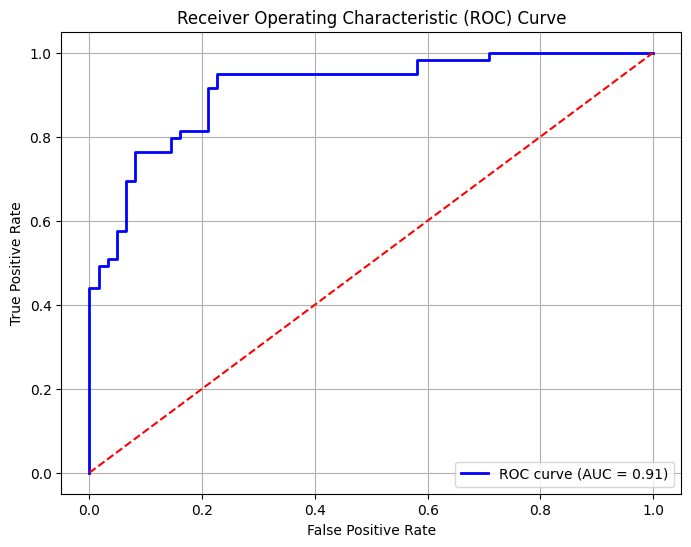

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability scores
y_prob = final_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

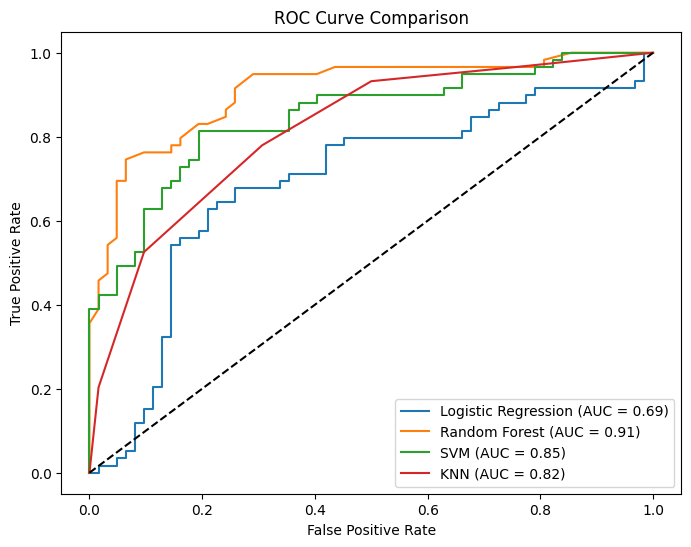

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Get probabilities for positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [21]:
import joblib
joblib.dump(final_model, "heart_attack_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']